In [84]:
import numpy as np
import math
import matplotlib.pyplot as plt

# input
input = np.array([
    [1,1],
    [1,0],
    [0,1],
    [0,0],
])

# output
target = np.array([1,0,0,0])

In [85]:
# config
num_input = 2
num_hidden = 5
num_output = 1

# sigmoid func
def sigmoid(x):
  return 1/(1 + math.exp(-x))

sig = np.vectorize(sigmoid)

In [86]:
# initialize weight and bias

b_hidden = np.random.uniform(low=-3, high=3, size=(num_hidden))
w_hidden = np.random.uniform(low=-3, high=3, size=(num_input, num_hidden))

print('w_hidden:', w_hidden)
print('b_hidden:', b_hidden)
print('\n')

b_output = np.random.uniform(low=-3, high=3, size=(num_output))
w_output = np.random.uniform(low=-3, high=3, size=(num_hidden, num_output))

print('w_output:', w_output)
print('b_output:', b_output)

w_hidden: [[-1.30103586  1.72216717 -1.50226785  0.09372265  1.05485678]
 [ 2.18515416  2.00876974 -2.61415131 -1.08520796  1.74629174]]
b_hidden: [-2.87651981 -0.69018596  1.7570895   1.63948399 -1.07253688]


w_output: [[-0.9354688 ]
 [-0.41668922]
 [ 1.59585998]
 [-0.26768599]
 [ 1.05975709]]
b_output: [0.42784752]


In [87]:
# loss and accuracy
loss_values = []
acc_values = []

lr = 0.5
epochs = 50

for epoch in range(epochs):
  MSE = 0
  new_target = np.zeros(4)

  for idx, inp in enumerate(input): # feedforward
    # hidden layer
    o_hidden = np.matmul(input[idx], w_hidden) + b_hidden
    o_hidden = sig(o_hidden)

    # print('----------------')
    # print(f'input[{idx}]:', input[idx], 'w_hidden:', w_hidden, 'b_hidden:', b_hidden)
    # print('o_hidden:', o_hidden)
    # print('\n')

    # output layer
    o_output = np.matmul(o_hidden, w_output)
    o_output = sig(o_output)

    # print('o_hidden', o_hidden, 'w_output:', w_output, 'b_output:', b_output)
    # print('o_output:', o_output)
    # print('\n')

    # count error
    error = target[idx] - o_output
    MSE += (error*error)

    new_target[idx] = o_output.round()
    eh = error @ w_output.T # error hidden

    # print('error', error)
    # print('eh', eh)
    # print(f'new_target[{idx}]:', new_target[idx])
    # print('\n')


    # backpropagation (using formula for sigmoid func)
    w_output = w_output + (lr * (error * o_output * (1 - o_output)) * o_hidden[np.newaxis].T)
    b_output = b_output + (lr * (error * o_output * (1 - o_output)))

    w_hidden = w_hidden + (lr * (eh * o_hidden * (1 - o_hidden)) * input[idx][np.newaxis].T)
    b_hidden = b_hidden + (lr * (eh * o_hidden * (1 - o_hidden)))

  MSE = MSE/4
  acc = 1 - (np.sum(np.absolute(target - new_target))/4)

  loss_values.append(MSE)
  acc_values.append(acc)

  print('epoch:', epoch, '|', 'error:', MSE, 'acc:', acc)
  # print('----------------')
  # print('\n')


epoch: 0 | error: [0.39279193] acc: 0.25
epoch: 1 | error: [0.32836246] acc: 0.5
epoch: 2 | error: [0.28392941] acc: 0.25
epoch: 3 | error: [0.25476702] acc: 0.5
epoch: 4 | error: [0.23502926] acc: 0.5
epoch: 5 | error: [0.22080964] acc: 0.75
epoch: 6 | error: [0.2098476] acc: 0.75
epoch: 7 | error: [0.20084739] acc: 0.75
epoch: 8 | error: [0.1930478] acc: 0.75
epoch: 9 | error: [0.18599245] acc: 0.75
epoch: 10 | error: [0.17940854] acc: 0.75
epoch: 11 | error: [0.17314031] acc: 0.75
epoch: 12 | error: [0.16710914] acc: 0.75
epoch: 13 | error: [0.16128619] acc: 0.75
epoch: 14 | error: [0.15567142] acc: 0.75
epoch: 15 | error: [0.15027724] acc: 0.75
epoch: 16 | error: [0.14511685] acc: 0.75
epoch: 17 | error: [0.14019774] acc: 0.75
epoch: 18 | error: [0.13551938] acc: 0.75
epoch: 19 | error: [0.13107393] acc: 0.75
epoch: 20 | error: [0.12684831] acc: 0.75
epoch: 21 | error: [0.12282643] acc: 0.75
epoch: 22 | error: [0.11899113] acc: 0.75
epoch: 23 | error: [0.11532559] acc: 0.75
epoch: 

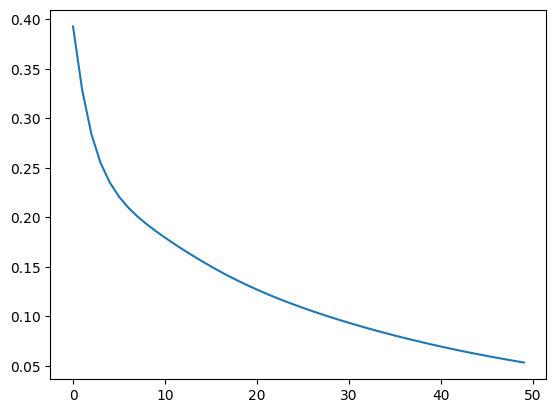

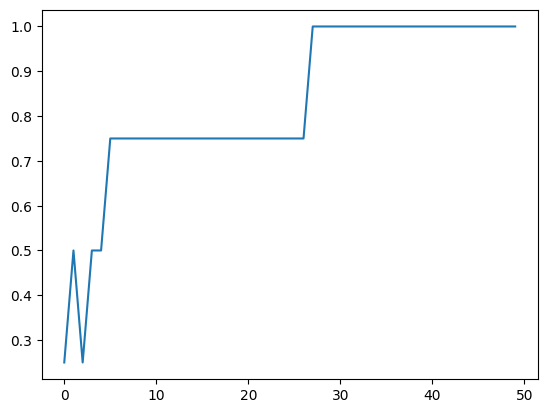

In [88]:
plot1 = plt.figure(1)
plt.plot(loss_values)
plt.show()

plot2 = plt.figure(2)
plt.plot(acc_values)
plt.show()